Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "İREM BAKIR - 21732881"
COLLABORATORS = ""

---

For this problem set, we'll be using the Jupyter notebook:

![](jupyter.png)

# GMT 456 - Distance Between Four Selected Buildings 

The aim of this assignment is to utilise open source tools and data to investigate the quality of OSM building footprint data.

**Data**: [Landcover, version 1](https://landcover.ai/) 

**Steps**:
1. Download the data, and use the associated mask file (N-34-97-C-b-1-2.tif) to obtain the vector of building footprints. Note the SRID of the project is **2180**.
2. Investigate the study area, the structure of buildings from the RGB image.
3 (optional). Download the OSM building data for the same study area. Investigate the [QuickOSM](https://plugins.qgis.org/plugins/QuickOSM/) plugin. 
4. Install the [x2Polygons](https://pypi.org/project/x2polygons/) package.
5. Read the [documentation](https://x2polygons.readthedocs.io/en/latest/) and understand how to compute the Hausdorff distance.
6. **Digitise the buildings that has a point-of-interest (POI)**. Save the layer under the **data/** folder with a name of **self.geojson**. The IDs should match with the POI layer.
7. The GeoJSON of the buildings, obtained from OSM and Mask, and the POI are provided under the **data/** folder.
8. Compute the Hausdorff distance between i) OSM and Self and ii) Self and OSM.
9. Do **not** change the contents of the **data/** folder unless it is *self.geojson*.


**Additional Resources**:
* https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0
* https://gis.stackexchange.com/questions/243265/overpass-api-select-all-building-polygons-excluding-pois-and-lines-within-cer (Overpass buildings)
* Investigate **Overpass API** to obtain building data from OSM. 


## Part 1 - Analysis on Geopandas

In [2]:
# Import packages
from x2polygons.polygon_distance import *
import geopandas as gpd
from IPython.display import Image

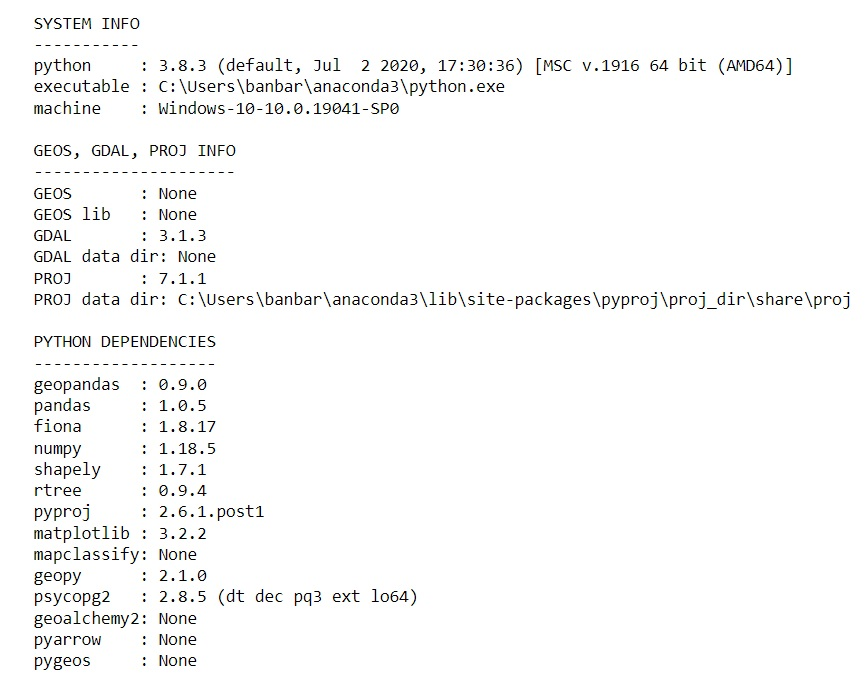

In [3]:
#gpd.show_versions()

# This configuration works
Image(filename='results/geopandas_configuration.jpg') 

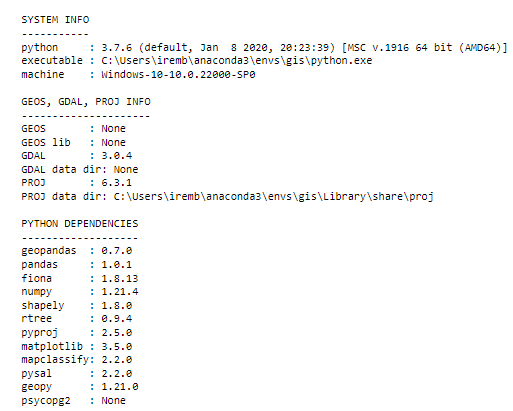

In [4]:
#gpd.show_versions()

# This configuration works
Image(filename='results/irem_deneme.png') 

In [5]:
# State the paths of input files
path_osm = r".\data_2180\OSM_buildings.geojson"
path_mask = r".\data_2180\mask_buildings.geojson"
path_poi = r".\data_2180\selected_poi.geojson"
path_self = r".\data_2180\self.geojson" # Define: path_self

In [6]:
# Read the buildings & POI data
osm_buildings = gpd.read_file(path_osm)
mask_buildings = gpd.read_file(path_mask)
poi = gpd.read_file(path_poi)
self_buildings = gpd.read_file(path_self) # Define: self_buildings

C:\Users\iremb\anaconda3\envs\gis\lib\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\iremb\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [7]:
def obtain_location_poi(poi, poi_id):
    '''
    This function returns the coordinates of a given poi_id. 
    It searches the poi_id under a provided list of poi Geodata series.
    If the given poi_id is found, then it returns the geometry of the point, otherwise it returns -1.
    '''
    # YOUR CODE HERE
    for i in range(len(poi)):
        if poi['id'][i] == poi_id:
            geometry = (poi['geometry'][i])
        elif poi_id not in poi['id']:
            geometry = -1
    return geometry

In [8]:
# Check whether the check_location_poi works correctly 
assert obtain_location_poi(poi, 3).x == 444317.88872473064
assert obtain_location_poi(poi, 3).y == 588535.4382380601
assert obtain_location_poi(poi, 5) == -1

In [9]:
# Find the polygon that contains a POI
def find_polygon(polygons, poi):
    '''
    Given a poi, a point object, returns the polygon among a list of polygons'''
    # YOUR CODE HERE
    for t in range(len(polygons)):
        a = px.within(polygons['geometry'][t])
        if a == True:
            return polygons.loc[t]
    if a == False:
        return -1 

In [10]:
# POI 3 is in which polygon of:
px = obtain_location_poi(poi, 3)
  # OSM:
assert find_polygon(osm_buildings, px)["full_id"] == 'w158000109'
  # Mask:
assert find_polygon(mask_buildings, px)["fid"] == 1148

# Define a point that is not within an OSM building.
px = Point([444440, 588903])
assert find_polygon(osm_buildings, px) == -1



In [15]:
from shapely.geometry import LineString
from geopandas import GeoDataFrame
def my_hausdorff_distance(p1, p2, name):
    '''
    Implement this function to not only return the Hausdorff distance but also the vertices that led to the computation
    of the Hausdorff distance. 
    
    SAVE THE RESULTING LINE under the <results/> folder with the provided name (third argument).
    
    Investigate the x2polygons source code to obtain the necessary code.
    
    The Hausdorff distance is computed from p1 to p2. There is no keyword argument to this function.
     
    '''
    distance_between_vertices = []
    
    vertices_a = geom.polygon_vertices(p1)
    vertices_b = geom.polygon_vertices(p2)

    for i in range(len(vertices_a)): # from each corner of the polygon 1
        minimum_distance = 1000.0 # Minimum distance set as initial.
        for j in range(len(vertices_b)): # to each corner of the polygon 2
            
            distance = ((vertices_a[i][0] - vertices_b[j][0])**2+(vertices_a[i][1] - vertices_b[j][1])**2)**0.5 # The distance between corners is calculated
            if minimum_distance > distance: # If the calculated distance is greater than the minimum distance
                minimum_distance = distance # minimum distance is calculated distance
                
        distance_between_vertices.append(minimum_distance) # the minimum distance is added to the list
        
        
    hab = max(distance_between_vertices) # The greatest value between the smallest distances becomes the Hausdorff distanc
    
    
    for i in range(len(vertices_a)):
        for j in range(len(vertices_b)):
            
            distance = ((vertices_a[i][0] - vertices_b[j][0])**2+(vertices_a[i][1] - vertices_b[j][1])**2)**0.5
            if hab==distance:
                 line={'geometry':[LineString([(vertices_a[i][0],vertices_a[i][1]),(vertices_b[j][0],vertices_b[j][1])])]}
                
    df = gpd.GeoDataFrame(line, crs="EPSG:2180")
            
    df.to_file('results\{}'.format(name), driver="GeoJSON")

    return hab


In [16]:
# Store the OSM IDs and Mask IDs that contains a POI
osm_ids = []
mask_ids = []

for index, row in poi.iterrows():
    id_poi = row["id"]
    px = obtain_location_poi(poi, id_poi)
    osm_ids.append(find_polygon(osm_buildings, px)["full_id"])
    mask_ids.append(find_polygon(mask_buildings, px)["fid"])
    

In [17]:
# Store the OSM IDs and Mask IDs that contains a POI
self_ids = []

for index, row in poi.iterrows():
    id_poi = row["id"]
    px = obtain_location_poi(poi, id_poi)
    self_ids.append(find_polygon(self_buildings, px)["id"])
    # Obtain self_ids 
    
print("self",self_ids)

self [3, 2, 1, 4]


In [18]:
from scipy.spatial.distance import directed_hausdorff
import numpy as np

def hausdorff_distance_analysis(source_1, pk_1, source_2, pk_2, source_1_ids, source_2_ids):
    '''
    The Hausdorff distance is to be computed from source 1 to source 2. 
    
    Example run - distance computation from OSM to Mask:
    hausdorff_distance_analysis(osm_buildings, "full_id", mask_buildings, "fid", osm_ids, mask_ids)
    
    
    Do NOT use iterrows() function.
    '''
                
    for i in range(len(poi)):
        p1=source_1.loc[source_1[pk_1]==source_1_ids[i]].explode().geometry.item() 
        p2=source_2.loc[source_2[pk_2]==source_2_ids[i]].explode().geometry.item() 
        
        vertices_a = geom.polygon_vertices(p1)
        vertices_b = geom.polygon_vertices(p2)
        
        array_x = []
        array_y = []
        
        for k in range(len(vertices_a)): # from each corner of the polygon 1
            array_x.append(vertices_a[k])
        for m in range(len(vertices_b)): # to each corner of the polygon 2
            array_y.append(vertices_b[m])   
        

        name = '{}_{}.geojson'.format(source_1_ids[i],source_2_ids[i])
        print("Hausdorff distance from:", "\n")
        print(source_1_ids[i], "-- to -->", source_2_ids[i], "\n")
        
        print("x2polygon:", hausdorff_distance(p1, p2))
        print("My implementation:",my_hausdorff_distance(p1,p2,name), "\t", "Outputfile: ", '{}'.format(name))
        print("scipy :", directed_hausdorff(array_x, array_y)[0], "\n")

In [19]:
hausdorff_distance_analysis(osm_buildings, "full_id", mask_buildings, "fid", osm_ids, mask_ids)

Hausdorff distance from: 

w158000109 -- to --> 1148.0 

x2polygon: 1.583675287217014
My implementation: 1.583675287217014 	 Outputfile:  w158000109_1148.0.geojson
scipy : 1.583675287217014 

Hausdorff distance from: 

w136550327 -- to --> 918.0 

x2polygon: 5.073990088997204
My implementation: 5.073990088997204 	 Outputfile:  w136550327_918.0.geojson
scipy : 5.073990088997204 

Hausdorff distance from: 

w192300694 -- to --> 901.0 

x2polygon: 6.7741484151836
My implementation: 6.7741484151836 	 Outputfile:  w192300694_901.0.geojson
scipy : 6.7741484151836 

Hausdorff distance from: 

w136585723 -- to --> 194.0 

x2polygon: 5.203391150094154
My implementation: 5.203391150094154 	 Outputfile:  w136585723_194.0.geojson
scipy : 5.203391150094154 



C:\Users\iremb\anaconda3\envs\gis\lib\site-packages\pandas\core\dtypes\cast.py:74: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)
C:\Users\iremb\anaconda3\envs\gis\lib\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)
C:\Users\iremb\anaconda3\envs\gis\lib\site-packages\scipy\spatial\distance.py:456: UserWarning: you are shuffling a '_memoryviewslice' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  result = _hausdorff.directed_hausdorff(u, v, seed)


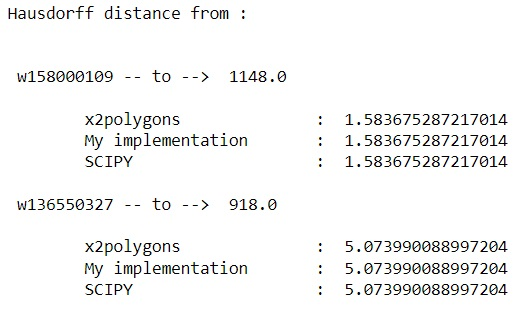

In [20]:
# The output of hausdorff_distance_anaylsis() function should look like: 
Image(filename='results/hausdorff_distance_analysis.jpg') 

In [21]:
# Investigate the results from Mask to OSM
hausdorff_distance_analysis(mask_buildings, "fid", osm_buildings, "full_id", mask_ids, osm_ids)

Hausdorff distance from: 

1148.0 -- to --> w158000109 

x2polygon: 18.659552242236206
My implementation: 18.659552242236206 	 Outputfile:  1148.0_w158000109.geojson
scipy : 18.659552242236206 

Hausdorff distance from: 

918.0 -- to --> w136550327 

x2polygon: 10.23620121229196
My implementation: 10.23620121229196 	 Outputfile:  918.0_w136550327.geojson
scipy : 10.23620121229196 

Hausdorff distance from: 

901.0 -- to --> w192300694 

x2polygon: 41.1173093622956
My implementation: 41.1173093622956 	 Outputfile:  901.0_w192300694.geojson
scipy : 41.1173093622956 

Hausdorff distance from: 

194.0 -- to --> w136585723 

x2polygon: 23.789334515904244
My implementation: 23.789334515904244 	 Outputfile:  194.0_w136585723.geojson
scipy : 23.789334515904244 



In [22]:
# OSM -> Mask 
path_result = r".\results\w192300694_901.0.geojson"
r1 = gpd.read_file(path_result)

# Mask -> OSM
path_result = r".\results\918.0_w136550327.geojson"
r2 = gpd.read_file(path_result)

In [23]:
assert r1['geometry'].length[0] == 6.7741484151836
assert r2['geometry'].length[0] == 10.23620121229196

In [24]:
self_buildings_primary_key = "id"

# Investigate the results from Self to OSM 
hausdorff_distance_analysis(self_buildings, self_buildings_primary_key, osm_buildings, "full_id", self_ids, osm_ids)

# Investigate the results from OSM to Self
hausdorff_distance_analysis(osm_buildings, "full_id", self_buildings, self_buildings_primary_key, osm_ids, self_ids)

# NOTE: The resulting .geojson files from these analyses should be saved under the results/ folder.

Hausdorff distance from: 

3 -- to --> w158000109 

x2polygon: 3.2973292328744632
My implementation: 3.2973292328744632 	 Outputfile:  3_w158000109.geojson
scipy : 3.2973292328744632 

Hausdorff distance from: 

2 -- to --> w136550327 

x2polygon: 5.027304334947876
My implementation: 5.027304334947876 	 Outputfile:  2_w136550327.geojson
scipy : 5.027304334947876 

Hausdorff distance from: 

1 -- to --> w192300694 

x2polygon: 40.84538663803269
My implementation: 40.84538663803269 	 Outputfile:  1_w192300694.geojson
scipy : 40.84538663803269 

Hausdorff distance from: 

4 -- to --> w136585723 

x2polygon: 20.765217359800243
My implementation: 20.765217359800243 	 Outputfile:  4_w136585723.geojson
scipy : 20.765217359800243 

Hausdorff distance from: 

w158000109 -- to --> 3 

x2polygon: 5.249264658843819
My implementation: 5.249264658843819 	 Outputfile:  w158000109_3.geojson
scipy : 5.249264658843819 

Hausdorff distance from: 

w136550327 -- to --> 2 

x2polygon: 5.027304334947876
My 

## Part 2 - Open Question

What is the design limitation of the hausdorff_distance() function as implemented in x2polygons? The better design will end in faster run-time.

In [25]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 